# Explore here

In [10]:
import pandas as pd
import numpy as np
import pickle

import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report

from sklearn.metrics import mean_squared_error, r2_score

from pickle import dump

In [11]:
with open('/workspaces/agumarquez-Proyecto-de-Random-Forest/data/raw/dataset.pkl', 'rb') as f:
    X_train, X_test, y_train, y_test = pickle.load(f)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(546, 8) (546,)
(137, 8) (137,)


In [13]:
# modelo
model1 = RandomForestClassifier(
    n_estimators=300, criterion='entropy', random_state=20, max_depth=5
)
model2 = RandomForestClassifier(
    n_estimators=100, criterion='entropy', random_state=20, max_depth=10
)

model1.fit(X_train, y_train)
model2.fit(X_train, y_train)

,n_estimators,100
,criterion,'entropy'
,max_depth,10
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [14]:
y_pred1_test = model1.predict(X_test)
y_pred1_train = model1.predict(X_train)

In [15]:
y_pred2_test = model2.predict(X_test)
y_pred2_train = model2.predict(X_train)

                Accuracy Train  Accuracy Test  F1 Train   F1 Test  \
Modelo                                                              
RF_300_depth5         0.915751       0.875912  0.915751  0.875912   
RF_100_depth10        0.998168       0.897810  0.998168  0.897810   

                Precision Train  Precision Test  Recall Train  Recall Test  
Modelo                                                                      
RF_300_depth5          0.915751        0.875912      0.915751     0.875912  
RF_100_depth10         0.998168        0.897810      0.998168     0.897810  


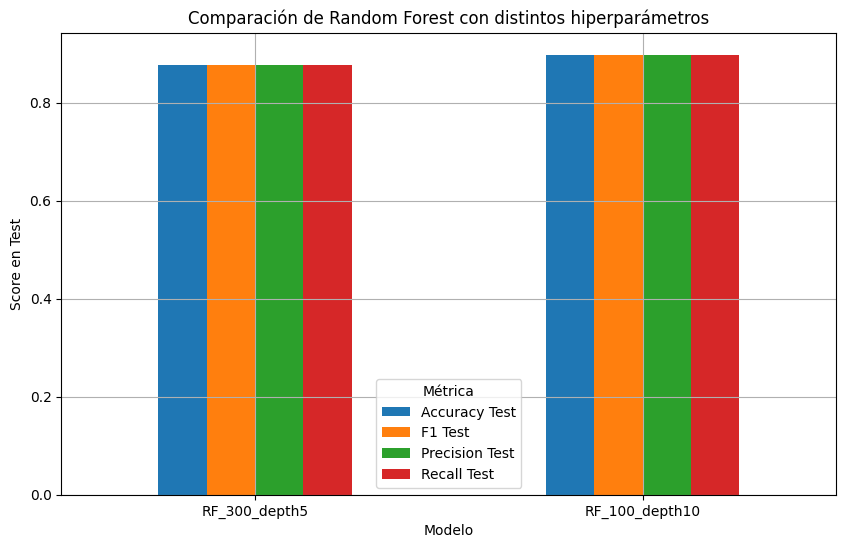

In [16]:
def calcular_metricas(nombre, y_train, y_test, y_pred_train, y_pred_test):
    return {
        "Modelo": nombre,
        "Accuracy Train": accuracy_score(y_train, y_pred_train),
        "Accuracy Test": accuracy_score(y_test, y_pred_test),
        "F1 Train": f1_score(y_train, y_pred_train, average="micro"),
        "F1 Test": f1_score(y_test, y_pred_test, average="micro"),
        "Precision Train": precision_score(y_train, y_pred_train, average="micro"),
        "Precision Test": precision_score(y_test, y_pred_test, average="micro"),
        "Recall Train": recall_score(y_train, y_pred_train, average="micro"),
        "Recall Test": recall_score(y_test, y_pred_test, average="micro"),
    }


resultados = []
resultados.append(calcular_metricas("RF_300_depth5", y_train, y_test, y_pred1_train, y_pred1_test))
resultados.append(calcular_metricas("RF_100_depth10", y_train, y_test, y_pred2_train, y_pred2_test))

# Convertir a DataFrame
df_resultados = pd.DataFrame(resultados).set_index("Modelo")
print(df_resultados)

# Gráfico comparativo (solo métricas de test)
df_resultados[["Accuracy Test","F1 Test","Precision Test","Recall Test"]].plot(
    kind="bar", figsize=(10,6), grid=True
)
plt.title("Comparación de Random Forest con distintos hiperparámetros")
plt.ylabel("Score en Test")
plt.xticks(rotation=0)
plt.legend(title="Métrica")
plt.show()

In [ ]:
dump(model2, open("random_forest_classifier_default_42.sav", "wb"))

### Conclusiones 

Tras probar diferentes configuraciones de hiperparámetros en el modelo de Random Forest, observamos que la combinación de 100 árboles (n_estimators=100) y una profundidad máxima de 10 (max_depth=10) ofrece un rendimiento superior y más equilibrado. Este ajuste logra un mejor balance en las métricas de evaluación —accuracy, F1, precision y recall—, mostrando una mayor capacidad de generalización frente a otras configuraciones probadas.